Saving news_articles.csv to news_articles (1).csv
Data Shape: (100, 4)
   word_count  has_keywords  read_time  category
0         142             0          3      tech
1        1043             0          6  business
2         442             1         12    sports
3        1449             1         13      tech
4        1937             1         10      tech

Missing values:
 word_count      0
has_keywords    0
read_time       0
category        0
dtype: int64

Classification Report:
               precision    recall  f1-score   support

    business       0.20      0.20      0.20         5
      sports       0.57      0.57      0.57         7
        tech       0.38      0.38      0.38         8

    accuracy                           0.40        20
   macro avg       0.38      0.38      0.38        20
weighted avg       0.40      0.40      0.40        20

Accuracy: 0.4
Precision (macro): 0.3821428571428571
Recall (macro): 0.3821428571428571
F1 Score (macro): 0.3821428571428571


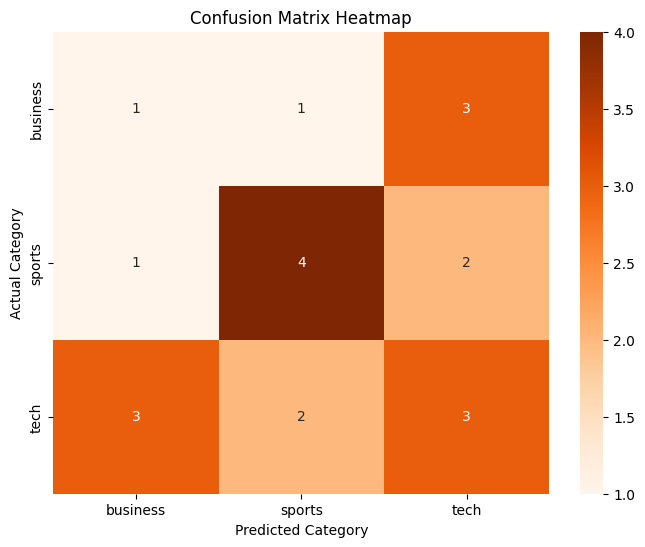

In [2]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score

# Step 1: Load Data
from google.colab import files
uploaded = files.upload()

# Step 2: Read CSV
df = pd.read_csv("news_articles.csv")
print("Data Shape:", df.shape)
print(df.head())

# Step 3: Check for missing values
print("\nMissing values:\n", df.isnull().sum())

# Step 4: Define features and target
X = df[['word_count', 'has_keywords', 'read_time']]
y = df['category']

# Step 5: Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Step 7: Evaluation Metrics
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision (macro):", precision_score(y_test, y_pred, average='macro'))
print("Recall (macro):", recall_score(y_test, y_pred, average='macro'))
print("F1 Score (macro):", f1_score(y_test, y_pred, average='macro'))

# Step 8: Confusion Matrix Heatmap
labels = sorted(y.unique())
cm = confusion_matrix(y_test, y_pred, labels=labels)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Category')
plt.ylabel('Actual Category')
plt.show()
